# Final Project Submission


* Student name: Sarabi Eventide 
* Student pace:Self-Paced
* Scheduled project review date/time: Monday, June 24th @ 2 PM MST
* Instructor name:  Eli Thomas
* Blog post URL: https://sarabieventide.github.io/set_it_and_forget_it_using_formulas_for_eda

# Contents
1. [Introduction](#introduction)
2. [Obtaining the Data](#obtaining_the_data) 
    - [Beginning Questions](#beginning_questions)
    - [Table Names](#table_names)
3. [Scrubbing/Cleaning](#scrubbing)
    - [Categorical Variables](#categorical_variables)
    - [Outliers](#outliers)
    - [Null Values](#null_values)
4. [Exploring](#exploring) 
    - [How are the housing prices distributed?](#distribution)
    - [How are the housing prices related to one another?](#collinearity)
5. [Modeling](#modeling)
    - [Normalizing the Data](#normalizing)
    - [Ordinary Least Squares Regression](#ols)
    - [Multiple Linear Regression via RFE](#RFE)
6. [Conclusion](#conclusion)
7. [Next Steps](#next_steps)


# 1. <a id="introduction">Introduction</a>

In this notebook I'm exploring the King County housing data set and attempting to predict housing prices. King County includes the Seattle-Tacoma metropolitan area in Washington. Although my model uses multiple linear regression, I also use ordinary least squares and recursive feature elimination in my exploration.



# 2. <a id="obtaining_the_data">Obtaining the Data</a>

<a id = "beginning_questions"> </a>
Before making any decisions about the data, we must define the scope of this data analysis. In order to do so, I shall consider the following questions:
1. Who are the stakeholders in this problem?
    - The stakeholders are Kings County real estate developers. Although they may not have in-depth knowledge of statistical analysis, they are familiar with market behavior and trends.
2. What do they want to know?
    - They want to be able to predict a the price of a house. In order to do this, we need to know how location, size, age and other factors affect the price and create models for these variables. 
3. What data is available to me?
    - I have a set of data containing information about the size, rooms, location, age, renovation and quality of the houses.
4. What tools will aid in completing the project?
    - In addition to using standard packages such as pandas, numpy, seaborn, matplotlib, scipi and sklearn, we will most likely create our projects using simple linear regression or multiple linear regression. 

This is the information I have available to me for this analysis: <a id="table_names"></a> 
 - **id**- A notation for a house
 - **date** - Date house was sold
 - **price** - Price is prediction target
 - **bedrooms** Number of Bedrooms/House
 - **bathrooms** - Number of bathrooms/bedrooms
 - **sqft_living** - Square footage of the home
 - **sqft_lot** - Square footage of the lot
 - **floors** - Total floors (levels) in house
 - **waterfront** - House which has a view to a waterfront
 - **view** - Has been viewed
 - **condition** - How good the condition is ( Overall )
 - **grade** - Overall grade given to the housing unit, based on King County grading system
 - **sqft_above** - square footage of house apart from basement
 - **sqft_basement** - square footage of the basement
 - **yr_built** - Built Year
 - **yr_renovated** - Year when house was renovated
 - **zipcode** - Zipcode
 - **lat** - Latitude coordinate
 - **long** - Longitude coordinate
 - **sqft_living15** - Living room area in 2015 (implies-- some renovations) This might or might not have affected the lotsize area
 - **sqft_lot15** - Lot size area in 2015 (implies-- some renovations)

To begin my data collection phase, I need to import a few libraries that will make it easier to work with the files. 

In [1]:
import pandas as pd # helps manipulate CSV files
import numpy as np  # helps with number crunching
import seaborn as sns # provides extra styling and functionality when visualizing
import matplotlib.pyplot as plt  # helps with visualizing
%matplotlib inline


import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('kc_house_data.csv')  # import the file
df.head()  # taking a look at the first few rows
           # to see what type of information I'm working with 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<br>

Looking at the excerpt, I see what appears to be both qualitative and quantitative variables. There also appears to be a few null values and quite a few zeros, especially in the "sqft_basement" and "yr_renovated" columns. Before I begin re-arranging the table, however, I'd like to look at other descriptive measures to see which groups may be more relevant than others. The new information will also help me appropriately clean the data.

<br>

In [3]:
df.info() # a quick summary of what the rows and columns contain 
df.shape # shape of the spreadsheet, printed under the row/column info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


(21597, 21)

A few columns (waterfront, condition, grade, yr_built, yr_renovated, zipcode) appear to be miscategorized as floats and ints, although the df.head() command shows they are most likely integers. This usually happens when someone includes letters or punctuation when inputting the data (for example, someone may write "one" instead of "1"). First, we need to look at the summary statistics to get a better feel for the data. The we need to find out whether there are any anomalies that cause the "sqft_basement" column to be labeled as objects and the "yr_renovated" column to be cast as a float, instead of what I suspect should be at least integers. 

Because df.head() and df.info() only give us a preview of the data, I need to look at summary statistics to see the overall trends. 

In [4]:
df.describe() # gather summary statistics of the data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Waterfront, condition, grade and zipcode are most likely categorical variables. I suspect this because their distributions are limited and the values are finite. The values in these columns describe quality, rather than quantity. The waterfront column, specifically, is full of boolean values (facing or not facing the waterfront). It is unclear at this moment whether the views column is a boolean (categorical variable) or a view count (quantitative variable). I also need to look further into the yr_renovated category, because most of the data is '0', but the max is '2015'. The sqft_basement is a considered an object, so it is not included in the summary statistics. I will need to change the data type in order to explore it. I'll look into each of these specific features to make decisions. 

# 3. <a id="scrubbing">Scrubbing the Data</a>

In [5]:
# Automate comparative scatterplot viewing
# this function allows me to plot 4 scatterplots next to each other
# for ease of comparison

def multi_scatter(column_names = None, target = None):
    fig, axs = plt.subplots(1, 4, sharey=True, figsize=(18, 6))
    for idx, feature in enumerate(column_names):
        df_train.plot(kind='scatter', x=feature, y=target, ax=axs[idx], label=feature, alpha = 0.3)
    plt.legend()
    
# Drop outliers in a column
def drop_max(column_name = None):
    max_val = df_train[column_name].idxmax()
    df_train[column_name] = df_train[column_name].drop([max_val])
    return df_train.boxplot([column_name])

# quickly build heatmaps
def correlation_heatmap(df): 
    _, ax = plt.subplots(figsize = (15, 10))
    colormap= sns.diverging_palette(220, 10, as_cmap = True)
    sns.heatmap(df_train.corr(), annot=True, cmap = colormap)

# create a separate data frame for cleaning, exploring and modelling    
df_train = pd.read_csv('kc_house_data.csv')  

I wrote the "multi_scatter" function so I could make scatterplots in groups of four. Although I used the funciton a lot in the beginning stages of my analysis, I wound up removing many of the plots as they were no longer relevant. 

"Drop_outliers" helps me determine which rows contain overly large values and then drop them. 

The box plot helps me visually check for outliers. The "correlation_heatmap" function helps determine how strongly related two features are, but it does not mean there is causation.

I created a separate data frame so I can manipulate the data into something I can create a model with while maintining the integrity of the original data set.

###  <a id = "categorical_variables"> Are the columns *really* categorical?</a>

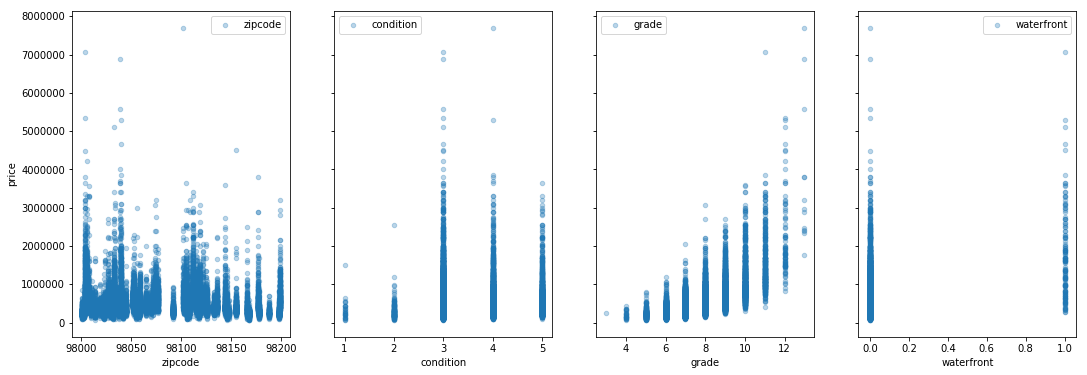

In [6]:
multi_scatter(column_names = ['zipcode', 'condition', 'grade', 'waterfront'], 
              target = 'price')

Here we see three distinct categorical variables: condition, grade, waterfront. The zipcode column appears to be more continuous, but common knowledge suggests a house can only exist in one zipcode at a time, therefore it is also a category. I will change them into a string for now, but I do not plan to one-hot encode until after cleaning the rest of the data and looking at the heatmap. 

### <a id = "outliers" > Dealing with Outliers </a>

Outliers have the ability to dramatically skew the summary statistics and make an unreliable model. Getting rid of them will help create a model that better fits the bulk of the data.

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

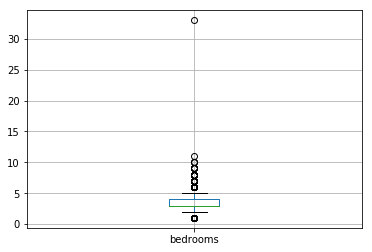

In [7]:
df_train.boxplot(['bedrooms'])
df_train.bedrooms.value_counts()

Only one house has 33 bedrooms, and this number is far higher than the next largest number of rooms. It seems unlikely that the number of bedrooms would jump from 11 to 33, so it is safe to assume this is a placeholder value. Getting rid of it will give cleaner summary statistics. 

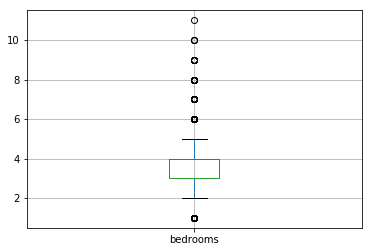

In [8]:
drop_max(column_name = 'bedrooms') # dropping the outlier makes a prettier box plot

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

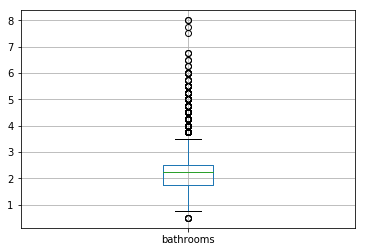

In [9]:
df.boxplot(['bathrooms']) # check for bathroom outliers
df_train.bathrooms.value_counts()

Though there are relatively few houses with more than 4 bathrooms, none of the numbers appear obvious ouliers. Therefore, this data is acceptable. 

The summary statistics also showed a housing lot that is almost 900,000 square feet. This is almost certainly an outlier (the possible the result of an incorrectly-zoned lot, which may also explain the 33 bedrooms), but I'd like to verify instead. While value counts are useful when you are dealing with a small set of categories, I need to use a data visualization method to look at the square footage, because there is a large range.

count     21597.000000
mean      12758.283512
std       27274.441950
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10083.000000
max      871200.000000
Name: sqft_lot15, dtype: float64

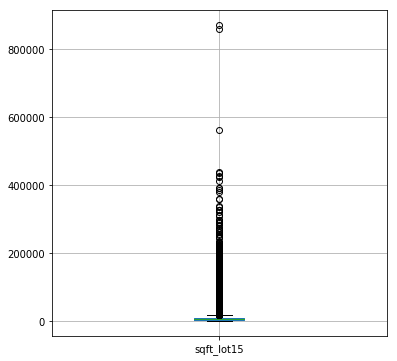

In [10]:
plt.figure(figsize = (6,6))
df_train.boxplot(['sqft_lot15']) 
df_train.sqft_lot15.describe()

The boxplot shows that some of these values are several hundred thousand square feet larger than the others. It also seems that the interquartile range is near zero. We already know that 75% of the lots are 10,000 square feet or less, but the mean is around 12000. This means the outliers are influencing the calculations. Removing the biggest outliers will creat handier data, then we can normalize the data later.

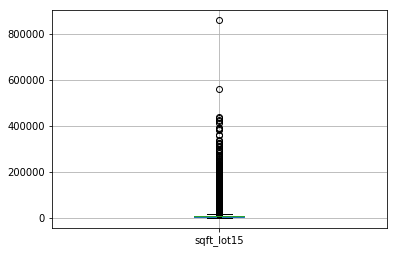

In [11]:
drop_max('sqft_lot15')

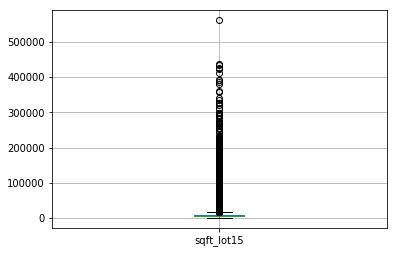

In [12]:
drop_max('sqft_lot15')

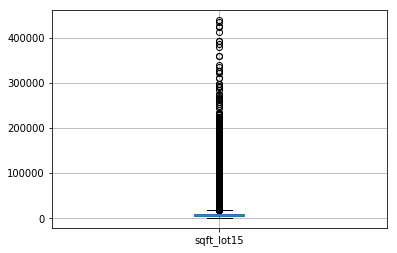

In [13]:
drop_max('sqft_lot15')

In [14]:
df_train.sqft_lot15.describe()

count     21594.000000
mean      12654.010373
std       25746.123012
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10080.000000
max      438213.000000
Name: sqft_lot15, dtype: float64

Removing the outliers actually pushed the mean higher. Because the mean depends partially on the number of data points, removing the outliers gave more weight to the next highest values. The best step for this column is normalization and scaling, because there are so many outliers. 

Now that the "quick fix" scrubbing is complete, it's time to take a close look at the year_renovated column, which has missing values.

### <a id = "null_values" > Where are the  null values in the data frame? <a/>

In [15]:
# I obtained these values by looking at df.info above. I subtracted the
# number of available data points from the total length of the list
waterfront_percent = round(((2376/21597)*100),2) #calculating percentage
reno_percent = round(((3842/21597)*100),2)
print(f"We are missing {waterfront_percent} percent of the waterfront data and {reno_percent} percent of the household renovation data")

We are missing 11.0 percent of the waterfront data and 17.79 percent of the household renovation data


In other words, we still have about 90% of the waterfront data and about 80% of the household renovation data. These are sufficient numbers to proceed, however, we must also check the data for placeholder values, because the of the high number of zeros.

We know that only two columns contain NaN values, but are there any placeholders or zeros in the data frame?

In [16]:
df_train['condition'].value_counts()  # checking for placeholders
                                # chose value counts for the sake of granularity
                                # lower frequencies get lost in a hist with so many data points

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [17]:
df_train['grade'].value_counts() 

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [18]:
df_train['zipcode'].unique() # checking for placeholder
# the list is too long to see all the values with value counts. 

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

For "grade" and "condition", I used value_counts() because it would be easy to type, say, '1' when a value is missing. If I saw an overwhelming amount of 1s, that would be a sign of a placeholder. In the condition category, we see a lot of 3s, this value makes sense because it is the value commonly thought of as "average condition" in layman's terms. It would actually be more unusual to see a lot of houses that are perfect (5) or in total disrepair (1). For zipcodes, rather than checking whether a value overwhelms the rest, we can check unique values. Because the zipcodes have a set format and are all in the same area, a placeholder number would stick out.

In [19]:
df_train['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

The view column is a quantitative variable, so it can remain an integer. It seems the majority of properties have not been viewed, which makes sense because only a small number of houses are for sale at a given time. I am choosing not to drop this category because view counts may give us an indication of which locations are in-demand. A high view count in a certain area means the demand is higher than the supply, which could drive prices up.

### <a id = "null_values"> Handling Null Values </a>

In [20]:
df_train['yr_renovated'].unique() # take a look at the values to look for anomalies

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

Here we see the yr_renovated column has a number of issues, besides being incomplete. First, there are two different ways to denote null values ('0' and 'nan'-- blank cells). Morever, the values are all floats, but there are no numbers following the years. Whereas I had assumed the date was typed as yr.month.day (e.g. 1990.05.23), this is simply a list of years. To clean this column, I need to do two things: 1) determine how to handle the null values and 2) reformat the values so they are simple integers (or potentially, datetime objects). 

Because I assume houses listed as NaN and '0' have never been renovated, I will put them in the same group. I will also group the rest of the data according to the age of the renovation. I consider anything after year 2000 new, whereas renovations between 1980 and 2000 are middle aged. Everything before 1980 is old renovation. 

In [21]:
# Grouping aka binning
bins = [0., 1950., 1980., 1990., 2000., 2015.]
names = ['never', 'before 1980', '1980-1989', '1990-1999', '2000-2015']
df_train['yr_ren_groups'] = pd.cut(df_train['yr_renovated'], bins, labels=names, right=False)

print(df_train['yr_ren_groups'].unique())  #check the values again
print(df_train['yr_ren_groups'].value_counts()) #check the how many entries are in each category

[never, 1990-1999, NaN, 2000-2015, before 1980, 1980-1989]
Categories (5, object): [never < before 1980 < 1980-1989 < 1990-1999 < 2000-2015]
never          17020
2000-2015        365
1990-1999        143
1980-1989        124
before 1980       89
Name: yr_ren_groups, dtype: int64


Next, let's look at the yr_built column.

In [22]:
df_train.yr_built.unique() #check for obvious place holders

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935], dtype=int64)

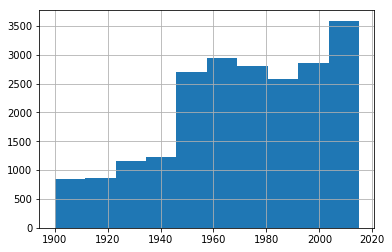

In [23]:
df_train.yr_built.hist() # check for categories with a seemingly large amount of values

Everything checks out with the yr_built category. The sharp rise in house construction between 1940 and 1945 is consistent with the rising population in the post-WWII era. I verified the population by looking at [the history of King County](https://www.kingcounty.gov/depts/records-licensing/archives/research-guides/KCHistoryQuickFacts.aspx). 

In [24]:
df_train['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [25]:
df_train['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
450.0       103
480.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
780.0        76
550.0        76
650.0        75
240.0        74
380.0        73
680.0        73
360.0        72
          ...  
556.0         1
1930.0        1
506.0         1
875.0         1
906.0         1
1960.0        1
1920.0        1
274.0         1
1798.0        1
1284.0        1
516.0         1
1770.0        1
2250.0        1
792.0         1
1880.0        1
3260.0        1
784.0         1
2490.0        1
3480.0        1
588.0         1
4820.0        1
2300.0        1
946.0         1
266.0         1
518.0         1
602.0         1
1548.0        1
915.0         1
1248.0        1
243.0         1
Name: sqft_basement, Len

In [26]:
df_train = df_train[df_train.sqft_basement != '?'] # because '0' may mean no baesment, drop '?'
df_train['sqft_basement'].value_counts()

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
530.0       103
450.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
780.0        76
550.0        76
650.0        75
240.0        74
380.0        73
680.0        73
360.0        72
850.0        72
          ...  
602.0         1
2300.0        1
946.0         1
1281.0        1
2580.0        1
1930.0        1
506.0         1
176.0         1
248.0         1
1024.0        1
65.0          1
2240.0        1
516.0         1
1770.0        1
2250.0        1
1913.0        1
1880.0        1
3260.0        1
2490.0        1
518.0         1
3480.0        1
875.0         1
792.0         1
475.0         1
1816.0        1
588.0         1
4820.0        1
2050.0        1
415.0         1
2190.0        1
Name: sqft_basement, Len

I have chosen to drop only the '?' place holder because we have no way of knowing whether the zero values are placeholders for missing information or simply an indication that the houses do not have basements, I am hesitant to remove them. 

In [27]:
df_train.sqft_basement = df_train.sqft_basement.astype('float').astype('int')  # changing the data type to an integer

## <a id ="exploring"> Exploring the Data </a>

In [28]:
import numpy as np  #this library helps with number crunching

from scipy.stats import kurtosis, skew  #so does this one
from sklearn.preprocessing import LabelEncoder

#### <a id = "distribution" > How are housing prices distributed? </a>

In [29]:
df_train['price'].describe()

count    2.114300e+04
mean     5.405107e+05
std      3.680751e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [30]:
df_train['price'].median(), df_train['price'].mode()

(450000.0, 0    350000.0
 dtype: float64)

The mean price is around 540,000 USD whereas the median and mode are 450,000 USD. Because the mean is much higher than the median and mode, we can say the price has positive skewness. There are houses being sold for higher-than-average value. Looking at the distribution will help us better understand the physical shape of the price data.

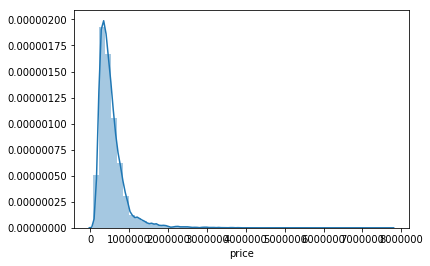

In [31]:
sns.distplot(df_train['price'])

Leptokurtic distributions are characterized by tall, skinny vertical columns and long tails. At a glance, the prices appear to be leptokurtic, which indicates an excess of extreme values. 

In [32]:
skew(df_train['price']), kurtosis(df_train['price'])

(4.035488891911525, 34.74268709331613)

Skewness is a measure of asymmetry. Ideally, skewness would be near zero and indicate a normal distribution ("bell curve"). Our skewness it 4.1, which is rather high. Kurtosis measures the "peak-ness" of our distribution. Ideal kurtosis is around 3. Our kurtosis is 35.6. The graph is skewed so far as to have an extreme peak. This can be fixed with scaling and normalization, but before I do any normalizing, I would like to check correlations between features in the current data set. 

#### <a id = "collinearity"> How are the features related to one another? </a>

In [33]:
# encode the categorical variables
lb_make = LabelEncoder() # call sklearns's encoder function
condition_encoded = lb_make.fit_transform(df_train['condition'])
waterfront_encoded = lb_make.fit_transform(df_train['waterfront'])
grade_encoded = lb_make.fit_transform(df_train['grade'])

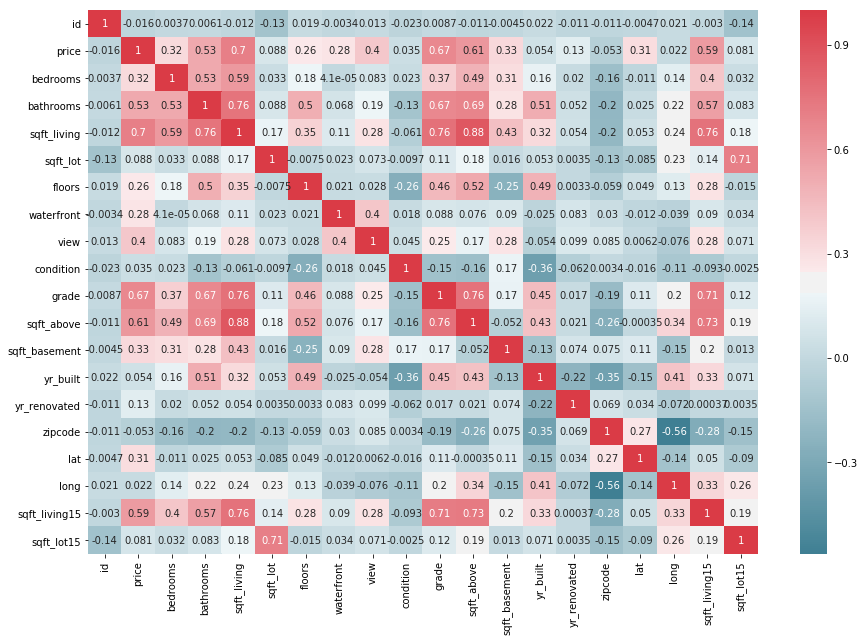

In [34]:
correlation_heatmap(df_train)

In [35]:
#  function to remove unnecessary columns
def drop_cols(columns, df):
    return df.drop(columns, axis=1, inplace=True)

Perfect correlation would be "1" and would show that the values are perfectly matched. 

In order to do Ordinary Lest Squares (OLS) regression, we need to eliminate multicollinearity (relationship between two variables, other than the target). Assuming a high correlation is .7 or above, I will eliminate sqft_living, which has a high correlation with multiple variables. This more or less solves the multicollinearity problem. 

In [36]:
drop_cols('sqft_living', df_train)

Below are several distribution plots, as well as their skew and kurtosis. Both of these measures help us determine whether the data is normally distributed. High skew and kurtosis mean the data set needs to be normalized. 

(0.5207301681970125, 1.2886571138771288)

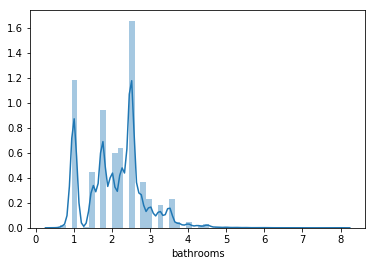

In [37]:
sns.distplot(df_train['bathrooms'])
skew(df_train['bathrooms']), kurtosis(df_train['bathrooms'])

(1.1096351080605986, 1.6037642298508619)

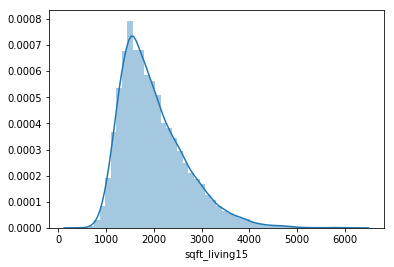

In [38]:
sns.distplot(df_train['sqft_living15'])
skew(df_train['sqft_living15']), kurtosis(df_train['sqft_living15'])

(0.7916276064595356, 1.1439923740456344)

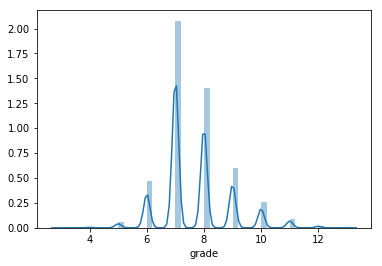

In [39]:
sns.distplot(df_train['grade'])
skew(df_train['grade']), kurtosis(df_train['grade'])

(1.4540374944526482, 3.444317088510621)

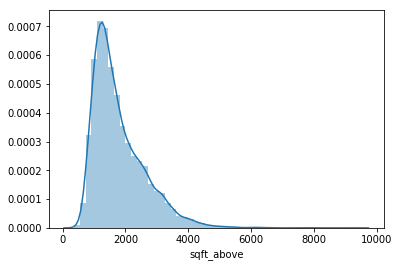

In [40]:
sns.distplot(df_train['sqft_above'])
skew(df_train['sqft_above']), kurtosis(df_train['sqft_above'])

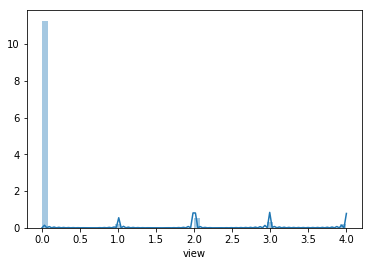

In [41]:
sns.distplot(df_train['view'])

## <a id = "modeling"> Modeling the Data </a>

In [42]:
import statsmodels.api as sm  # used to build statistical models
import statsmodels.formula.api as smf # get the formulas

from statsmodels.formula.api import ols # ordinary least squares library
from sklearn.feature_selection import RFE  # recursive feature elimination: selects features
                                            # by considering smaller and smaller set 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import LabelEncoder  # encodes categorical variables and retains numerical analysis
from sklearn.model_selection import train_test_split # tests subsets of the data
from sklearn.metrics import mean_squared_error # avg of sqr of error. e.g how "correct" our model is
from sklearn.model_selection import cross_val_score # assess how model will generalize to an independent data set
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

### <a id = "normalizing"> Normalizing the Data </a>

In [43]:
# normalizing and scaling the values and saving them to a new DataFrame
df_normal = pd.DataFrame([])
df_normal['bathrooms_norm'] = np.log(df_train['bathrooms'])
df_normal['sqft_living15_norm'] = np.log(df_train['sqft_living15'])
df_normal['sqft_above_norm'] = np.log(df_train['sqft_above'])
df_normal['grade_norm'] = np.log(df_train['grade'])

In [44]:
df_normal['price']= df_train['price'] #adding the non-normalized price to the data frame

In [45]:
df_normal['price_norm'] = np.log(df_train['price']) #adding the normalized price

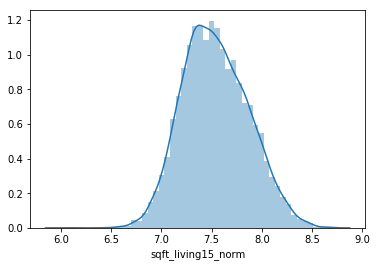

In [46]:
# looking at the new, normalized distribution.
sns.distplot(df_normal['sqft_living15_norm'])

In order to normalize the features, I did a log transform.

In [47]:
df_normal.head()

,bathrooms_norm,sqft_living15_norm,sqft_above_norm,grade_norm,price,price_norm
0,0.000000,7.200425,7.073270,1.945910,221900.0,12.309982
1,0.810930,7.432484,7.682482,1.945910,538000.0,13.195614
2,0.000000,7.908387,6.646391,1.791759,180000.0,12.100712
3,1.098612,7.215240,6.956545,1.945910,604000.0,13.311329
4,0.693147,7.495542,7.426549,2.079442,510000.0,13.142166


The .head() shows us out new dataframe. The .describe() shows the new summary statistics.

In [48]:
df_normal.describe()

,bathrooms_norm,sqft_living15_norm,sqft_above_norm,grade_norm,price,price_norm
count,21143.000000,21143.000000,21143.000000,21143.000000,2.114300e+04,21143.000000
mean,0.677864,7.539816,7.395423,2.024487,5.405107e+05,13.048427
std,0.392122,0.327437,0.427014,0.149441,3.680751e+05,0.526654
min,-0.693147,5.988961,5.913503,1.098612,7.800000e+04,11.264464
25%,0.559616,7.306531,7.090077,1.945910,3.220000e+05,12.682307
50%,0.810930,7.517521,7.352441,1.945910,4.500000e+05,13.017003
75%,0.916291,7.766417,7.700748,2.079442,6.450000e+05,13.377006
max,2.079442,8.733916,9.149528,2.564949,7.700000e+06,15.856731


In [49]:
df_non_norm = pd.DataFrame() #creating a subset of features that have not been normalized for comparison
df_non_norm['price'] = df_train['price']
df_non_norm['bathrooms'] = df_train['bathrooms']
df_non_norm['sqft_living15'] = df_train['sqft_living15']
df_non_norm['sqft_above'] = df_train['sqft_above']
df_non_norm['grade'] = df_train['grade']

In [50]:
df_non_norm.head()

,price,bathrooms,sqft_living15,sqft_above,grade
0,221900.0,1.00,1340,1180,7
1,538000.0,2.25,1690,2170,7
2,180000.0,1.00,2720,770,6
3,604000.0,3.00,1360,1050,7
4,510000.0,2.00,1800,1680,8


### <a id = "ols"> Ordinary Least Squares Regression </a>

In [51]:
def quick_ols(DataFrame = None, target = None):  #formula to run ordinary least squares
    col_names = DataFrame.describe().columns.drop([target])
    results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
    for idx, val in enumerate(col_names):
        print ("Housing: {}~".format(target) + val)
        print ("------------------------------")

        f = '{}~'.format(target) + val
        model = smf.ols(formula=f, data=DataFrame).fit()
        X_new = pd.DataFrame({val: [DataFrame[val].min(), DataFrame[val].max()]});
        preds = model.predict(X_new)
        results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
        print(results[idx+1])

The below lists of values are the result of Ordinary Least Squares regression. I used them as a way to quickly compare my features of interest. The object was to find the highest r-squared value and the lowest p-value. 

In [52]:
quick_ols(df_normal, 'price_norm')

Housing: price_norm~bathrooms_norm
------------------------------
['bathrooms_norm', 0.27016869749182615, 12.575205858973003, 0.6981064616798265, 0.0]
Housing: price_norm~sqft_living15_norm
------------------------------
['sqft_living15_norm', 0.3696092854084373, 5.675674013113803, 0.9778425630323332, 0.0]
Housing: price_norm~sqft_above_norm
------------------------------
['sqft_above_norm', 0.3430595932470991, 7.706088773310776, 0.7223843635957179, 0.0]
Housing: price_norm~grade_norm
------------------------------
['grade_norm', 0.4809563811891998, 8.100490705556899, 2.4440442610239335, 0.0]
Housing: price_norm~price
------------------------------
['price', 0.7949787476640287, 12.358867935032094, 1.275754315612067e-06, 0.0]


In [53]:
quick_ols(df_non_norm, 'price')

Housing: price~bathrooms
------------------------------
['bathrooms', 0.2765590820157299, 7543.027212929315, 251865.7380241959, 0.0]
Housing: price~sqft_living15
------------------------------
['sqft_living15', 0.34388281695646883, -85070.13039624477, 314.79387312341316, 0.0]
Housing: price~sqft_above
------------------------------
['sqft_above', 0.36619760286513114, 59476.448393188584, 268.874077714709, 0.0]
Housing: price~grade
------------------------------
['grade', 0.44587388409323325, -1062409.7098533665, 209305.5589858494, 0.0]


Based on the two regressions above, grade seems to be the highest predictor of price, followed by square footage and bathrooms. This is confirmed when we use OLS for the entire training data set. Looking at the other r-squared values, we also see that these four variables are the strongest predictors of price overall. 

In [54]:
quick_ols(df_train, 'price')

Housing: price~id
------------------------------
['id', 0.0002495087385449013, 549770.525853815, -2.0213468316700443e-06, 0.021628847150151783]
Housing: price~bedrooms
------------------------------
['bedrooms', 0.10021824588099015, 105105.30020456141, 129154.68765275997, 0.0]
Housing: price~bathrooms
------------------------------
['bathrooms', 0.2765590820157299, 7543.027212929315, 251865.7380241959, 0.0]
Housing: price~sqft_lot
------------------------------
['sqft_lot', 0.007732844956811813, 528660.7173043663, 0.7854379181700802, 1.4301826266154853e-37]
Housing: price~floors
------------------------------
['floors', 0.06571765932410922, 279162.5416092528, 174979.72363772013, 0.0]
Housing: price~waterfront
------------------------------
['waterfront', 0.07733105362197934, 532791.3767549028, 1198228.6936676265, 0.0]
Housing: price~view
------------------------------
['view', 0.15774906044067227, 495824.84238024266, 190385.36652566004, 0.0]
Housing: price~condition
-------------------

### <a id = "RFE">Linear Regression via RFE </a>

In [55]:
X = df_non_norm.drop(['price'], axis = 1)
y = df_normal.price

linreg = LinearRegression()  # calling on an sklearn function
r_list = []  # explain r:
adj_r_list = [] # explain adjusted r: 
list_n = list(range(5,51,10))

for n in list_n: 
        select_n = RFE(linreg, n_features_to_select = n)
        select_n = select_n.fit(X, np.ravel(y))
        selected_columns = X.columns[select_n.support_ ]
        linreg.fit(X[selected_columns],y)
        yhat = linreg.predict(X[selected_columns])
        SS_Residual = np.sum((y-yhat)**2)
        SS_Total = np.sum((y-np.mean(y))**2)
        r_squared = 1 - (float(SS_Residual))/SS_Total

        print(r_squared)
        adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
        print(adjusted_r_squared)
    
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)


0.4824973228128735
0.48239939440390633
0.4824973228128735
0.48239939440390633
0.4824973228128735
0.48239939440390633
0.4824973228128735
0.48239939440390633
0.4824973228128735
0.48239939440390633


In [56]:
X = df_non_norm.drop(['price'], axis = 1)
y = df_non_norm.price
   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)
MSE_test = []
MSE_train = []
list_n = list(range(5,51,10))
for n in list_n: 
        select_n = RFE(linreg, n_features_to_select = n)
        select_n = select_n.fit(X_train, np.ravel(y_train))
        selected_columns = X.columns[select_n.support_ ]
        linreg.fit(X_train[selected_columns],y_train)
        yhat_train = linreg.predict(X_train[selected_columns])
        yhat_test = linreg.predict(X_test[selected_columns])
        mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
        mse_test =np.sum((y_test-yhat_test)**2)/len(y_test)
        print(mse_train)
        print(mse_test)
MSE_test.append(mse_test)
MSE_train.append(mse_train)

70988461894.52885
66632758302.494446
70988461894.52885
66632758302.494446
70988461894.52885
66632758302.494446
70988461894.52885
66632758302.494446
70988461894.52885
66632758302.494446


In [57]:
pred_50 = RFE(linreg, n_features_to_select = 85)
pred_50 = select_n.fit(X, np.ravel(y))
selected_columns = X.columns[select_n.support_]

cv_10_results = cross_val_score(linreg, X[selected_columns], y, cv=10, scoring="neg_mean_squared_error")

cv_10_results

array([-7.99200875e+10, -8.25585136e+10, -6.10185334e+10, -8.36993451e+10,
       -6.46162242e+10, -6.16844175e+10, -6.19163056e+10, -6.53755504e+10,
       -7.00369676e+10, -7.35724693e+10])

The r-value is 0.6968500556073738.


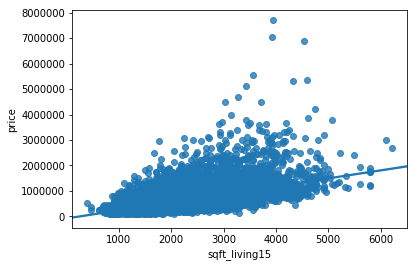

In [58]:
sns.regplot(x=df_non_norm['sqft_living15'], y=df_non_norm['price'], ci=95)
import math
sqft_liv_r_val = math.sqrt(0.4856)
print("The r-value is {}.".format(sqft_liv_r_val))

The r-value is 0.7048404074682438.


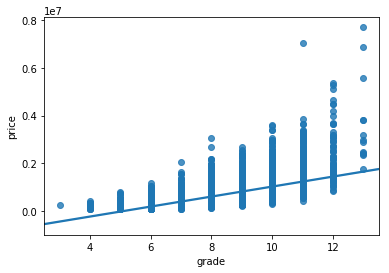

In [59]:
sns.regplot(x=df_non_norm['grade'], y=df_non_norm['price'], ci=95)
grade_r_val = math.sqrt(0.4968)
print("The r-value is {}.".format(grade_r_val))

The r-value is 0.7048404074682438.


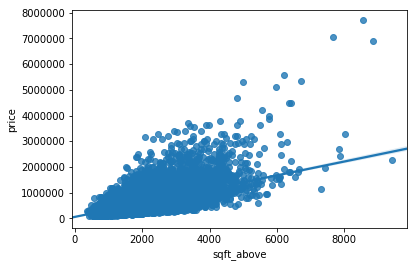

In [60]:
sns.regplot(x=df_non_norm['sqft_above'], y=df_non_norm['price'], ci=95)
grade_r_val = math.sqrt(0.4968)
print("The r-value is {}.".format(grade_r_val))

The r-value is 0.7048404074682438.


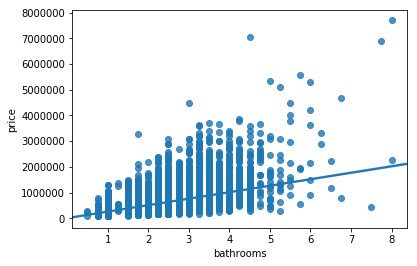

In [61]:
sns.regplot(x=df_non_norm['bathrooms'], y=df_non_norm['price'], ci=95)
grade_r_val = math.sqrt(0.4968)
print("The r-value is {}.".format(grade_r_val))

The above is simple linear regression. Now That I have chosen my features, I would like to see the model with multiple linear regression.

In [62]:
#MR Model 1:
X = df_non_norm[['grade', 'sqft_living15', 'bathrooms']]  
y = df_non_norm['price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     6430.
Date:                Mon, 24 Jun 2019   Prob (F-statistic):               0.00
Time:                        13:31:53   Log-Likelihood:            -2.9412e+05
No. Observations:               21143   AIC:                         5.882e+05
Df Residuals:                   21139   BIC:                         5.883e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.664e+05   1.33e+04    -65.168      0.000   -8.92e+05    -8.4e+05
grade          1.408e+05   2493.397     56.469      0.000    1.36e+05    1.46e+05
sqft_living15   108.7610      3.875     28.068      0.000     101.166     116.356
bathrooms      5.316e+04   3248.724     16.364      0.000    4.68e+04    5.95e+04
==============================================================================
Omnibus:                    19440.413   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2062393.389
Skew:                           4.061   Prob(JB):                         0.00
Kurtosis:                      50.698   Cond. No.                     1.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The above model compares three features (grade, sqft_living15, bathrooms) to the price. As expected, the p-value is low (actually, it's essentially 0) and the r-value is high (0.801). Based on these numbers, I have high confidence that 97.5% of the data is explained by that MR Model 1. The standard error for sqft_living15 is very low (~4), which suggests it may be the strongest predictor of price in this model.

In [63]:
#MR Model 2
X = df_non_norm[['grade', 'sqft_living15', 'bathrooms', 'sqft_above']] 
y = df_non_norm['price'] 
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     4927.
Date:                Mon, 24 Jun 2019   Prob (F-statistic):               0.00
Time:                        13:31:53   Log-Likelihood:            -2.9401e+05
No. Observations:               21143   AIC:                         5.880e+05
Df Residuals:                   21138   BIC:                         5.881e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.821e+05   1.44e+04    -54.326      0.000    -8.1e+05   -7.54e+05
grade          1.271e+05   2648.350     47.975      0.000    1.22e+05    1.32e+05
sqft_living15    85.0468      4.174     20.376      0.000      76.866      93.228
bathrooms       3.62e+04   3428.742     10.558      0.000    2.95e+04    4.29e+04
sqft_above       58.1410      3.924     14.819      0.000      50.451      65.831
==============================================================================
Omnibus:                    18809.212   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1747335.135
Skew:                           3.885   Prob(JB):                         0.00
Kurtosis:                      46.853   Cond. No.                     2.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In this model, I compared all of my chosen features to the price. The r-squared value increased slightly, suggesting a better fit. 

In [64]:
#MR Model 3
X = df[['grade', 'sqft_living15', 'bathrooms', 'sqft_above']] 
y = df['price'] 
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     5030.
Date:                Mon, 24 Jun 2019   Prob (F-statistic):               0.00
Time:                        13:31:54   Log-Likelihood:            -3.0028e+05
No. Observations:               21597   AIC:                         6.006e+05
Df Residuals:                   21592   BIC:                         6.006e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.819e+05   1.42e+04    -54.962      0.000    -8.1e+05   -7.54e+05
grade          1.274e+05   2615.981     48.705      0.000    1.22e+05    1.33e+05
sqft_living15    82.8561      4.130     20.062      0.000      74.761      90.951
bathrooms      3.627e+04   3383.637     10.720      0.000    2.96e+04    4.29e+04
sqft_above       58.8061      3.881     15.151      0.000      51.199      66.414
==============================================================================
Omnibus:                    19141.980   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1752289.555
Skew:                           3.866   Prob(JB):                         0.00
Kurtosis:                      46.445   Cond. No.                     2.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model 3 uses the same features as Model 2, but rather than using the cleaned training data, I used the original data set. The r-squared value is about the same as Model 2, but the standard erros are far lower and all the p-values are 2. I'll verify the model with sklearn. Before doing that, though, I'd like to see what the numbers look like when I use more features, however, the more features we add, the more multicollinearity problems we run into.

In [65]:
X = df[['grade', 'sqft_living15', 'bathrooms', 'sqft_above', 'condition', 'bedrooms']] 
y = df['price'] 
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     3644.
Date:                Mon, 24 Jun 2019   Prob (F-statistic):               0.00
Time:                        13:31:54   Log-Likelihood:            -2.9984e+05
No. Observations:               21597   AIC:                         5.997e+05
Df Residuals:                   21590   BIC:                         5.997e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -1.08e+06   1.82e+04    -59.477      0.000   -1.12e+06   -1.04e+06
grade          1.302e+05   2586.166     50.343      0.000    1.25e+05    1.35e+05
sqft_living15    77.4393      4.062     19.065      0.000      69.478      85.401
bathrooms      4.159e+04   3488.735     11.921      0.000    3.48e+04    4.84e+04
sqft_above       70.6386      3.889     18.162      0.000      63.015      78.262
condition      8.326e+04   2772.011     30.037      0.000    7.78e+04    8.87e+04
bedrooms      -8442.6463   2303.829     -3.665      0.000    -1.3e+04   -3926.972
==============================================================================
Omnibus:                    19270.834   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1827932.298
Skew:                           3.897   Prob(JB):                         0.00
Kurtosis:                      47.391   Cond. No.                     2.97e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## <a id = "conclusion"> Conclusion </a>

Based on the results of the models, it seems grade and the square footage of the living space are the best predictors for housing price. The formula should be as follows: price = intercept + (coefficient * grade) + (coefficient * sqft_living15) + (coefficient + sqft_above) + (coefficient + bathrooms). I've couched it into a function, which I can then call to test the results. 

In [66]:
def price_prediction(grade, sqft_living15, sqft_above, bathrooms):
    price = -781900 + (127400* grade) + ( 82.8561 * sqft_living15) + (58.1410 * sqft_above) + (36200 *bathrooms)
    print (price)
    return

In [67]:
price_prediction(7, 1340, 1180, 1)

325733.554


In [68]:
def price_more_feat(grade, sqft_living15, sqft_above, bathrooms, condition, bedrooms):
    price =  -1080000 + (130200 *grade) + (77.4393 * sqft_living15) + (41590*bathrooms) + (70.6386 *sqft_above) +(83260 *condition) + (-8442.6463 * bedrooms)
    print (price)
    return

In [69]:
price_more_feat(7, 1340,1180,1,3,3)

284564.2711


The model gets more accurate the more features we add.

## <a id ="next_steps"> Next Steps </a>

Although we have chosen a few good predictors of housing price, this analysis is just the beginning. Given more time (and more data) we could create an even more granular analysis. For example, we could: 

    * Separate different zipcodes into different dataframes and determine trends within these areas
    * Determine where the waterfront is, and see if there's a major relationship between price and waterfront or whether it's the zipcode that makes the difference
    * Determine desirability of neighborhoods based on environmental factors
    * Figure out why there are so few data points for between the zipcodes 98075 and 98100
    * Determine the age of the house and see how this affects the price
    * Determine HOW MUCH renovation affects price (by comparing the price before and after)
    
    
    